In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk', rc={"lines.linewidth": 2} )

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Asset:
    def __init__(self, name, ER, sigma):
        self.name  = name
        self.ER    = ER
        self.sigma = sigma

# Exercise 1

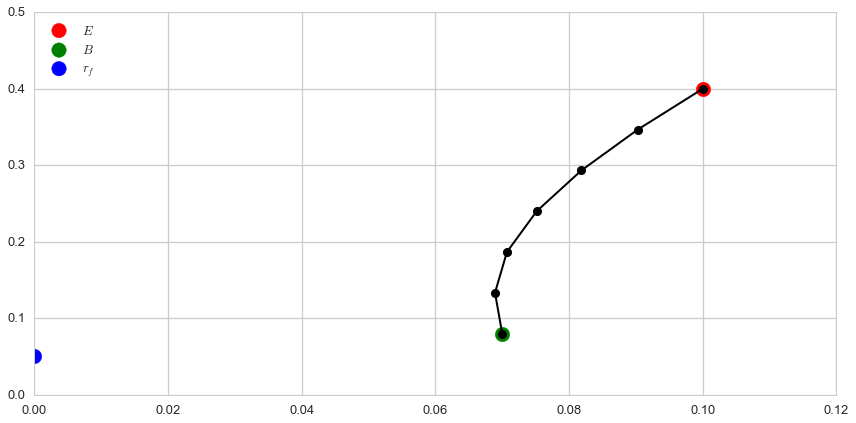

In [11]:
def form_portfolio(A, B, w_A, rho, name):
    w_B   = 1-w_A
    ER    = w_A * A.ER + w_B * B.ER
    sigma = w_A**2 * A.sigma**2 + w_B**2 * B.sigma**2 + 2 * w_A * w_B * A.sigma * B.sigma * rho
    sigma = np.sqrt(sigma)
    return Asset(name, ER, sigma)

E   = Asset('E', 0.4  , 0.10  )
B   = Asset('B', 0.08 , 0.07 )
RHO = 0.55
RF  = 0.05

fig, (ax1) = plt.subplots(1,1, figsize=(12,6))
X = []
Y = []
for w in [0, 1/6, 2/6, 3/6, 4/6, 5/6, 1]:
    pf  = form_portfolio(E,B,w, RHO, 'P_{0:1.2f}'.format(w) )
    X.append(pf.sigma)
    Y.append(pf.ER   )
    
#ax1.plot( [0, 0.12 ], [RF,0.5], color='b', linestyle=':' )

ax1.plot(X,Y             , marker='o', linestyle='-' , color='k')
ax1.scatter(E.sigma, E.ER, marker='o', color='r'     , label='$E$'  , s=210)
ax1.scatter(B.sigma, B.ER, marker='o', color='g'     , label='$B$'  , s=210)
ax1.scatter(0        , RF, marker='o', color='b'     , label='$r_f$', s=210)


ax1.legend(loc=2)

_ = ax1.set_xlim([   0, np.max(X) + 0.02 ])
_ = ax1.set_ylim([   0, np.max(Y) + 0.1 ])

plt.tight_layout()

plt.savefig('Capital_0.pdf')

# Exercise 2

In [138]:
def min_var(A , B, rho): 
    return ( B.sigma**2 - rho * A.sigma * B.sigma ) / ( A.sigma**2 + B.sigma**2 - 2* rho * A.sigma * B.sigma )

In [137]:
RHO = 0.1
A = Asset( 'A', 0.10, 0.22 )
B = Asset( 'B', 0.07, 0.18 )

w_A = min_var(A,B,RHO)
w_B = 1 - w_A
print( 'w_A = {0:1.2f}'.format(w_A) )
print( 'w_A = {0:1.2f}'.format(w_B) )

w_A = 0.39
w_A = 0.61


# Exercise 3

In [154]:
def risk_free(A, B): 
    return B.sigma / (A.sigma+B.sigma) * A.ER + A.sigma / (A.sigma+B.sigma) * B.ER

In [160]:
A = Asset( 'A', 0.03, 0.10 )
B = Asset( 'B', 0.04, 0.15 )

risk_free(A,B)

0.034